<a href="https://colab.research.google.com/github/andreeaiaconi/aileen-s-website/blob/main/TeslaStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df = pd.read_csv('Tesla Stock Data.csv')

df

,Date,Adj Close,Close,High,Low,Open,Volume
0,14/03/2022,255.456665,255.456665,266.899994,252.013336,260.203339,71152200
1,15/03/2022,267.296661,267.296661,268.523346,252.190002,258.423340,66841200
2,16/03/2022,280.076660,280.076660,280.666656,267.420013,269.666656,84028800
3,17/03/2022,290.533325,290.533325,291.666656,275.239990,276.996674,66582900
4,18/03/2022,301.796661,301.796661,302.616669,289.130005,291.496674,100414200
...,...,...,...,...,...,...,...
674,15/11/2024,320.720001,320.720001,324.679993,309.220001,310.570007,114440300
675,18/11/2024,338.739990,338.739990,348.549988,330.010010,340.730011,126547500
676,19/11/2024,346.000000,346.000000,347.380005,332.750000,335.760010,88852500
677,20/11/2024,342.029999,342.029999,346.600006,334.299988,345.000000,66340700


In [15]:
# Convert the 'Close' column to numeric type, handling potential errors
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Round the 'Close' column to 6 decimal places
df['Close'] = df['Close'].round(6)

df = df[['Date', 'Close']]

df.drop([0], inplace = True)


df


<ipython-input-15-e0034b5db759>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([0], inplace = True)


,Date,Close
1,15/03/2022,267.296661
2,16/03/2022,280.076660
3,17/03/2022,290.533325
4,18/03/2022,301.796661
5,21/03/2022,307.053345
...,...,...
674,15/11/2024,320.720001
675,18/11/2024,338.739990
676,19/11/2024,346.000000
677,20/11/2024,342.029999


In [16]:
df['Date']

,Date
1,15/03/2022
2,16/03/2022
3,17/03/2022
4,18/03/2022
5,21/03/2022
...,...
674,15/11/2024
675,18/11/2024
676,19/11/2024
677,20/11/2024


In [17]:
import datetime

def str_to_datetime(s):
    """
    Converts a date string in 'dd/mm/yyyy' or 'dd-mm-yyyy' format to a datetime object.
    """
    try:
        # First, try parsing with dd-mm-yyyy format
        split = s.split('-')
        day, month, year = int(split[0]), int(split[1]), int(split[2])
        return datetime.datetime(day=day, month=month, year=year)
    except ValueError:
        # If that fails, try parsing with dd/mm/yyyy format
        split = s.split('/')
        day, month, year = int(split[0]), int(split[1]), int(split[2])
        return datetime.datetime(day=day, month=month, year=year)



In [18]:
df

,Date,Close
1,15/03/2022,267.296661
2,16/03/2022,280.076660
3,17/03/2022,290.533325
4,18/03/2022,301.796661
5,21/03/2022,307.053345
...,...,...
674,15/11/2024,320.720001
675,18/11/2024,338.739990
676,19/11/2024,346.000000
677,20/11/2024,342.029999


In [19]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-19-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
1,2022-03-15
2,2022-03-16
3,2022-03-17
4,2022-03-18
5,2022-03-21
...,...
674,2024-11-15
675,2024-11-18
676,2024-11-19
677,2024-11-20


In [20]:
df.index = df.pop('Date')
df

,Close
Date,
2022-03-15,267.296661
2022-03-16,280.076660
2022-03-17,290.533325
2022-03-18,301.796661
2022-03-21,307.053345
...,...
2024-11-15,320.720001
2024-11-18,338.739990
2024-11-19,346.000000


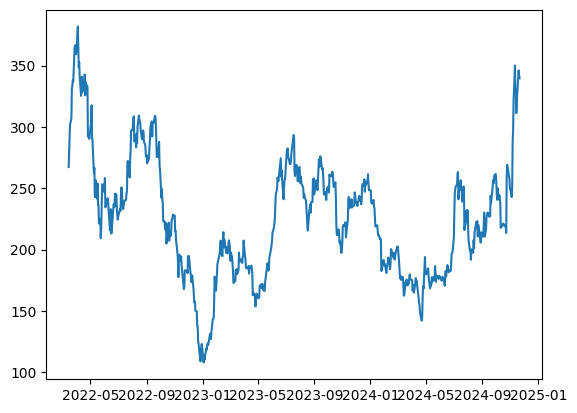

In [21]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

because I'm using the LSTM model, we need to convert this into a supervised learning problem by creating the df_to_windowed_df function

In [22]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '14-03-2022'
windowed_df = df_to_windowed_df(df,
                                '20-03-2022',
                                '21-11-2024',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-20,267.296661,280.076660,290.533325,301.796661
1,2022-03-22,290.533325,301.796661,307.053345,331.326660
2,2022-03-23,301.796661,307.053345,331.326660,333.036682
3,2022-03-24,307.053345,331.326660,333.036682,337.973328
4,2022-03-25,331.326660,333.036682,337.973328,336.880005
...,...,...,...,...,...
669,2024-11-15,328.489990,330.239990,311.179993,320.720001
670,2024-11-18,330.239990,311.179993,320.720001,338.739990
671,2024-11-19,311.179993,320.720001,338.739990,346.000000
672,2024-11-20,320.720001,338.739990,346.000000,342.029999


convert into numpy arrays to feed it straight into a tensorflow model

In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((674,), (674, 3, 1), (674,))

now we're splitting the data into train , validation and testing partition

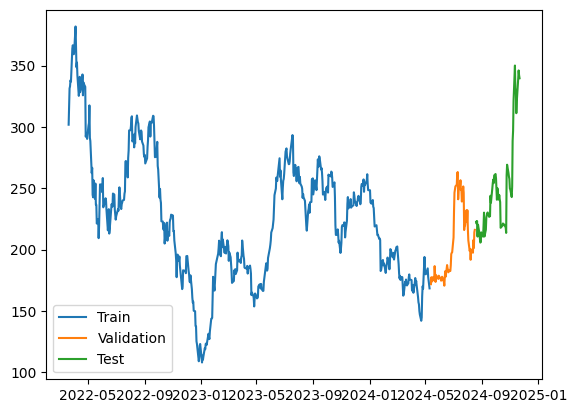

In [24]:
# Training the first 80% of data, validating the next 10%...
# ...and testing the last 10%
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 53460.7578 - mean_absolute_error: 225.2731 - val_loss: 42328.8633 - val_mean_absolute_error: 203.7110
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51972.9844 - mean_absolute_error: 222.1418 - val_loss: 41861.7227 - val_mean_absolute_error: 202.5614
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52777.7188 - mean_absolute_error: 223.7635 - val_loss: 41015.7695 - val_mean_absolute_error: 200.4598
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51802.8906 - mean_absolute_error: 221.4028 - val_loss: 39515.9609 - val_mean_absolute_error: 196.6836
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48842.5625 - mean_absolute_error: 215.2021 - val_loss: 36860.3750 - val_mean_absolute_error: 189.7905
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46153.3242 - mean_absolute_error: 208.7268 - val_loss: 32441.9297 - val_mean_absolute_error: 177.7942
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


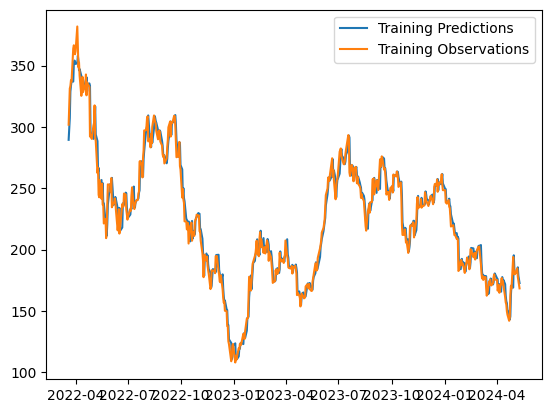

In [26]:
# Training prediction
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


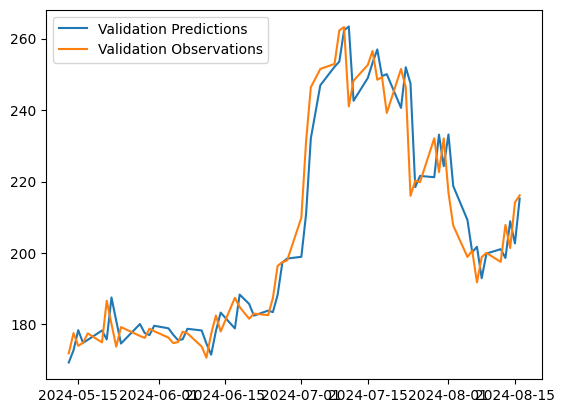

In [27]:
# Validation prediction
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


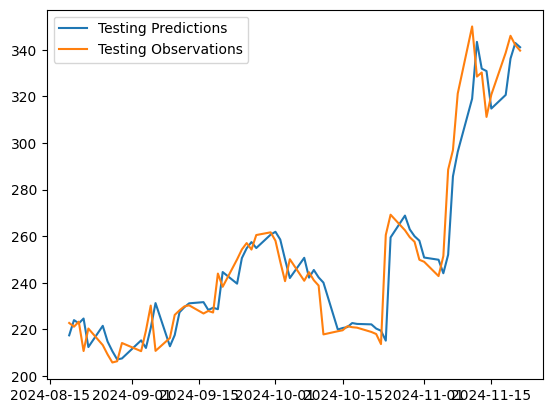

In [28]:
# Testing prediction
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

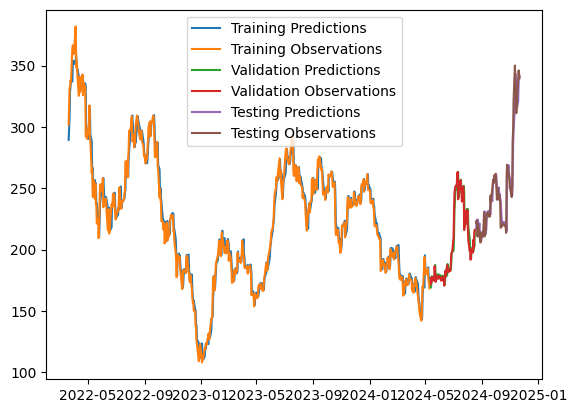

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [30]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

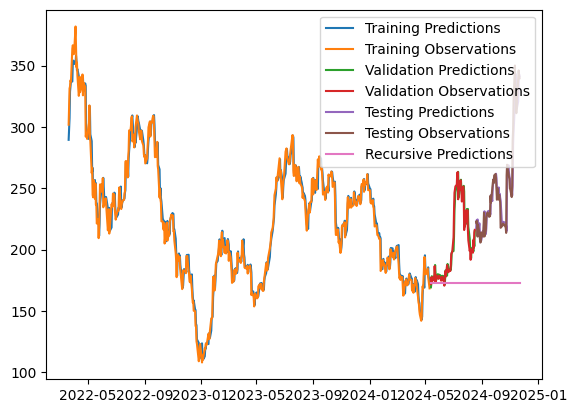

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])